In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objs as go

# Polygon manning 0.035

## Sheltown

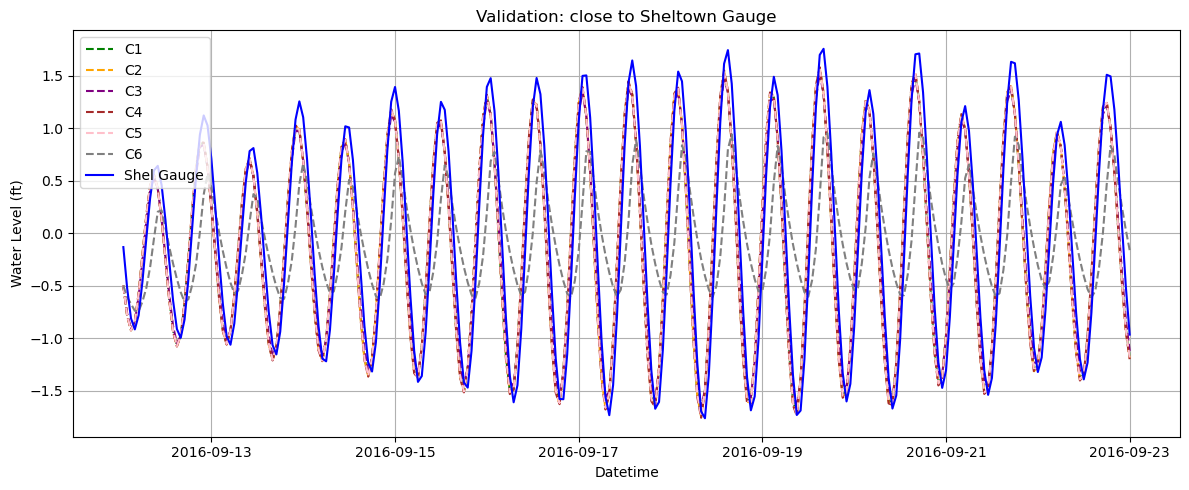

In [350]:
# Compare to Shelltown

# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx" #projectA_geometry Coastal copy

# === Load Data ===
df_cross1 = pd.read_excel(excel_path, sheet_name='Cross1')
df_shel = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean column names ===
df_cross1.columns = df_cross1.columns.str.strip()
df_shel.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross1['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_shel['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-12"
end_date = "2016-09-23"

# === Filter both DataFrames to the same date range ===
df_cross1_filtered = df_cross1[(df_cross1['Datetime'] >= start_date) & (df_cross1['Datetime'] <= end_date)]
df_shel_filtered = df_shel[(df_shel['Datetime'] >= start_date) & (df_shel['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross1_filtered[['Datetime', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']],
    df_shel_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['C1'], label='C1', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['C2'], label='C2', linestyle='--', color='orange')
plt.plot(df_merged['Datetime'], df_merged['C3'], label='C3', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['C4'], label='C4', linestyle='--', color='brown')
plt.plot(df_merged['Datetime'], df_merged['C5'], label='C5', linestyle='--', color='pink')
plt.plot(df_merged['Datetime'], df_merged['C6'], label='C6', linestyle='--', color='grey')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Shel Gauge', linestyle='-', color='blue')


plt.title("Validation: close to Sheltown Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

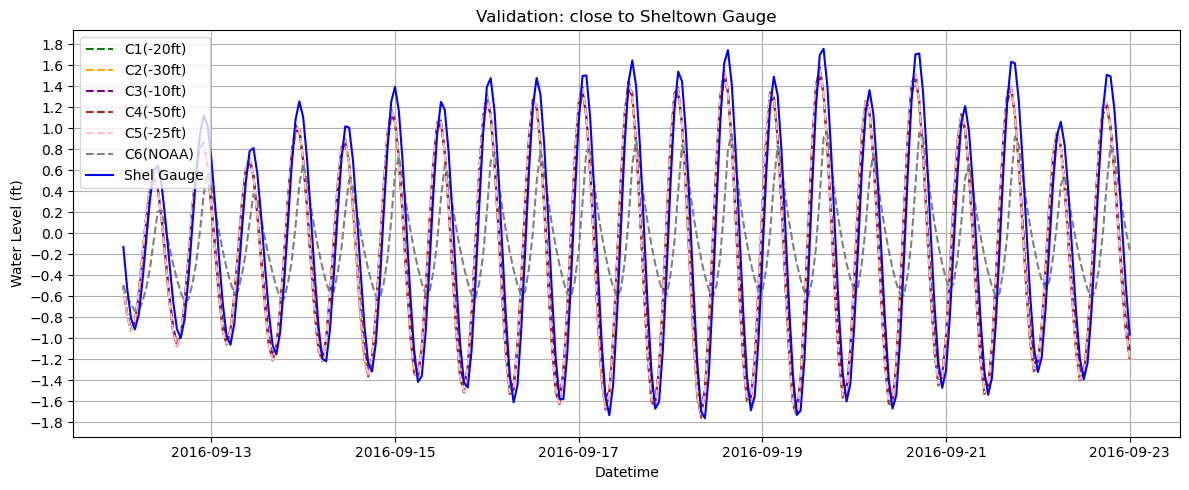

In [346]:
# === Path to Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"

# === Load Data ===
df_cross1 = pd.read_excel(excel_path, sheet_name='Cross1')
df_shel = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean column names ===
df_cross1.columns = df_cross1.columns.str.strip()
df_shel.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross1['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_shel['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === Filter date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_cross1_filtered = df_cross1[(df_cross1['Datetime'] >= start_date) & (df_cross1['Datetime'] <= end_date)]
df_shel_filtered = df_shel[(df_shel['Datetime'] >= start_date) & (df_shel['Datetime'] <= end_date)]

# === Merge on common timestamps ===
df_merged = pd.merge(
    df_cross1_filtered[['Datetime', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6']],
    df_shel_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['C1'], label='C1(-20ft)', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['C2'], label='C2(-30ft)', linestyle='--', color='orange')
plt.plot(df_merged['Datetime'], df_merged['C3'], label='C3(-10ft)', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['C4'], label='C4(-50ft)', linestyle='--', color='brown')
plt.plot(df_merged['Datetime'], df_merged['C5'], label='C5(-25ft)', linestyle='--', color='pink')
plt.plot(df_merged['Datetime'], df_merged['C6'], label='C6(NOAA)', linestyle='--', color='grey')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Shel Gauge', linestyle='-', color='blue')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

plt.title("Validation: close to Sheltown Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [353]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['C1'],
    mode='lines', name='C1(-20ft)', line=dict(dash='dash', color='green')
))
fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['C2'],
    mode='lines', name='C2(-30ft)', line=dict(dash='dash', color='orange')
))
fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['C3'],
    mode='lines', name='C3(-10ft)', line=dict(dash='dash', color='purple')
))
fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['C4'],
    mode='lines', name='C4(-50ft)', line=dict(dash='dash', color='brown')
))
fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['C5'],
    mode='lines', name='C5(-25ft)', line=dict(dash='dash', color='pink')
))
fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['C6'],
    mode='lines', name='C6(NOAA)', line=dict(dash='dash', color='grey')
))
fig.add_trace(go.Scatter(
    x=df_merged['Datetime'], y=df_merged['WaterLevel_ft'],
    mode='lines', name='Shel Gauge', line=dict(dash='solid', color='blue')
))

fig.update_layout(
    title="Validation: close to Sheltown Gauge",
    xaxis_title="Datetime",
    yaxis_title="Water Level (ft)",
    legend_title="Legend",
    height=500,
    width=1000,
    yaxis=dict(dtick=0.2, gridcolor='lightgrey'),
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template='plotly_white'
)

fig.show()

### Scatter plot
    Define the peak-finding function
    Use the function to get daily peaks
    Filter peaks by date range

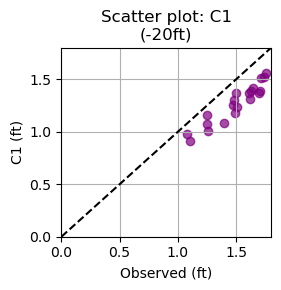

In [333]:
# Find the two largest values per day for C1 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C1_peak1': sim_peaks[0], 'C1_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C1 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C1', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C1_peak1'], peaks_simple_filtered['C1_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C1 (ft)')
plt.title('Scatter plot: C1\n(-20ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

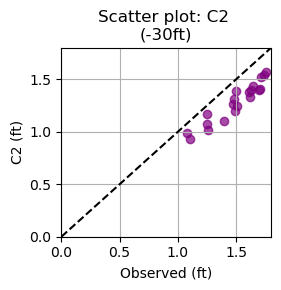

In [334]:
# Find the two largest values per day for C2 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C2_peak1': sim_peaks[0], 'C2_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C2 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C2', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C2_peak1'], peaks_simple_filtered['C2_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C2 (ft)')
plt.title('Scatter plot: C2 \n(-30ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

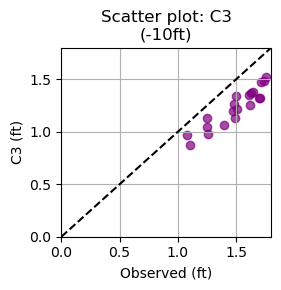

In [335]:
# Find the two largest values per day for C3 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C3_peak1': sim_peaks[0], 'C3_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C3 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C3', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C3_peak1'], peaks_simple_filtered['C3_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C3 (ft)')
plt.title('Scatter plot: C3\n(-10ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

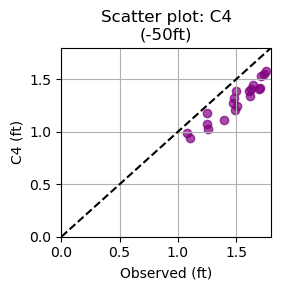

In [336]:
# Find the two largest values per day for C4 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C4_peak1': sim_peaks[0], 'C4_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C4 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C4', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C4_peak1'], peaks_simple_filtered['C4_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C4 (ft)')
plt.title('Scatter plot: C4\n(-50ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

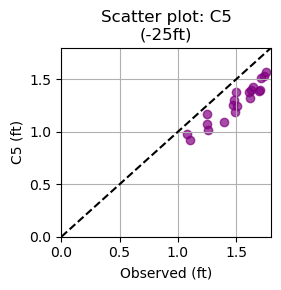

In [337]:
# Find the two largest values per day for C5 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C5_peak1': sim_peaks[0], 'C5_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C5 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C5', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C5_peak1'], peaks_simple_filtered['C5_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C5 (ft)')
plt.title('Scatter plot: C5\n(-25ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

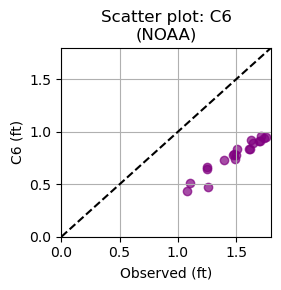

In [338]:
# Find the two largest values per day for C6 and WaterLevel_ft, but do not merge on Datetime DF
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        # Pad with NaN if less than 2 values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C6_peak1': sim_peaks[0], 'C6_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# Get peaks for C6 and WaterLevel_ft for the entire time series
peaks_simple = find_daily_peaks_simple(df_merged, 'C6', 'WaterLevel_ft')

# Filter peaks_simple for the desired date range
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_simple_filtered = peaks_simple[(peaks_simple['date'] >= start) & (peaks_simple['date'] <= end)]

# Scatter plot for all daily peaks (flattened)
plt.figure(figsize=(3, 3))
x = pd.concat([peaks_simple_filtered['obs_peak1'], peaks_simple_filtered['obs_peak2']])
y = pd.concat([peaks_simple_filtered['C6_peak1'], peaks_simple_filtered['C6_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C6 (ft)')
plt.title('Scatter plot: C6\n(NOAA)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Snow

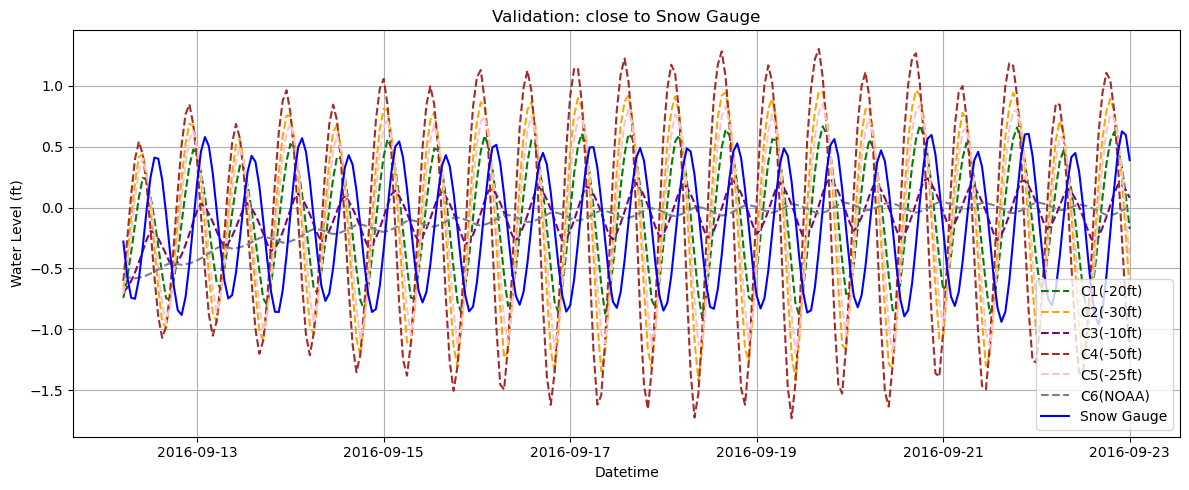

In [348]:

# === Path to Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"

# === Load Data ===
df_cross31 = pd.read_excel(excel_path, sheet_name='Cross 31')
df_s = pd.read_excel(excel_path, sheet_name='Snow')

# === Clean column names ===
df_cross31.columns = df_cross31.columns.str.strip()
df_s.columns = df_s.columns.str.strip()

# === Convert datetime ===
df_cross31['Datetime'] = pd.to_datetime(df_cross31['Datetime'])
df_s['Datetime'] = pd.to_datetime(df_s['Datetime'])

# === Filter date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_cross31_filtered = df_cross31[(df_cross31['Datetime'] >= start_date) & (df_cross31['Datetime'] <= end_date)]
df_s_filtered = df_s[(df_s['Datetime'] >= start_date) & (df_s['Datetime'] <= end_date)]

# === Merge on common timestamps ===
df_merged = pd.merge(
    df_cross31_filtered[['Datetime', '(s)C1', '(s)C2', '(s)C3', '(s)C4', '(s)C5', '(s)C6']],
    df_s_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['(s)C1'], label='C1(-20ft)', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['(s)C2'], label='C2(-30ft)', linestyle='--', color='orange')
plt.plot(df_merged['Datetime'], df_merged['(s)C3'], label='C3(-10ft)', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['(s)C4'], label='C4(-50ft)', linestyle='--', color='brown')
plt.plot(df_merged['Datetime'], df_merged['(s)C5'], label='C5(-25ft)', linestyle='--', color='pink')
plt.plot(df_merged['Datetime'], df_merged['(s)C6'], label='C6(NOAA)', linestyle='--', color='grey')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Snow Gauge', linestyle='-', color='blue')


plt.title("Validation: close to Snow Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# === Path to Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"

# === Load Data ===
df_cross31 = pd.read_excel(excel_path, sheet_name='Cross 31')
df_s = pd.read_excel(excel_path, sheet_name='Snow')

# === Clean column names ===
df_cross31.columns = df_cross31.columns.str.strip()
df_s.columns = df_s.columns.str.strip()

# === Convert datetime ===
df_cross31['Datetime'] = pd.to_datetime(df_cross31['Datetime'])
df_s['Datetime'] = pd.to_datetime(df_s['Datetime'])

# === Filter date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_cross31_filtered = df_cross31[(df_cross31['Datetime'] >= start_date) & (df_cross31['Datetime'] <= end_date)]
df_s_filtered = df_s[(df_s['Datetime'] >= start_date) & (df_s['Datetime'] <= end_date)]

# === Merge on common timestamps ===
df_merged = pd.merge(
    df_cross31_filtered[['Datetime', '(s)C1', '(s)C2', '(s)C3', '(s)C4', '(s)C5', '(s)C6']],
    df_s_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
plt.plot(df_merged['Datetime'], df_merged['(s)C1'], label='C1(-20ft)', linestyle='--', color='green')
plt.plot(df_merged['Datetime'], df_merged['(s)C2'], label='C2(-30ft)', linestyle='--', color='orange')
plt.plot(df_merged['Datetime'], df_merged['(s)C3'], label='C3(-10ft)', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['(s)C4'], label='C4(-50ft)', linestyle='--', color='brown')
plt.plot(df_merged['Datetime'], df_merged['(s)C5'], label='C5(-25ft)', linestyle='--', color='pink')
plt.plot(df_merged['Datetime'], df_merged['(s)C6'], label='C6(NOAA)', linestyle='--', color='grey')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Snow Gauge', linestyle='-', color='blue')
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))

plt.title("Validation: close to Snow Gauge")
plt.xlabel("Datetime")
plt.ylabel("Predicted (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### RMSE

In [ ]:
#Snow gauge RMSE calculation C1

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C1 ===
sim = df_snow_merged['(s)C1']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c1 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C1:", round(rmse_c1, 3), "ft")



✅ Step 4: RMSE for Snow Hill (s)C1: 0.565 ft


In [97]:
#Snow gauge RMSE calculation C2

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C2 ===
sim = df_snow_merged['(s)C2']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c2 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C2:", round(rmse_c2, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C2: 0.916 ft


In [98]:
#Snow gauge RMSE calculation C3

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C3 ===
sim = df_snow_merged['(s)C3']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c3 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C3:", round(rmse_c3, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C3: 0.375 ft


In [100]:
#Snow gauge RMSE calculation C4

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C4 ===
sim = df_snow_merged['(s)C4']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c4 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C4:", round(rmse_c4, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C4: 1.211 ft


In [102]:
#Snow gauge RMSE calculation C5

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C5 ===
sim = df_snow_merged['(s)C5']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c5 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C5:", round(rmse_c5, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C5: 0.762 ft


In [103]:
#Snow gauge RMSE calculation C6

# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Step-by-step RMSE for (s)C6 ===
sim = df_snow_merged['(s)C6']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c6 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill (s)C6:", round(rmse_c6, 3), "ft")


✅ Step 4: RMSE for Snow Hill (s)C6: 0.495 ft


### Nash-Sutcliffe Efficiency (NSE) 

In [ ]:
# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge simulated and observed on datetime ===
df_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === List of simulated columns
simulated_cols = ['(s)C1', '(s)C2', '(s)C3', '(s)C4', '(s)C5', '(s)C6']

# === Compute RMSE and NSE for each
results = []
for col in simulated_cols:
    sim = df_merged[col]
    obs = df_merged['WaterLevel_ft']
    
    # RMSE
    rmse = np.sqrt(((sim - obs) ** 2).mean())
    
    # NSE
    numerator = ((sim - obs) ** 2).sum()
    denominator = ((obs - obs.mean()) ** 2).sum()
    nse = 1 - (numerator / denominator)
    
    results.append({'Cell': col, 'RMSE (ft)': round(rmse, 3), 'NSE': round(nse, 3)})

# === Convert to DataFrame and display
df_results = pd.DataFrame(results)
print(df_results)


    Cell  RMSE (ft)    NSE
0  (s)C1      0.565 -0.403
1  (s)C2      0.916 -2.685
2  (s)C3      0.375  0.382
3  (s)C4      1.211 -5.437
4  (s)C5      0.762 -1.550
5  (s)C6      0.495 -0.076


### Scatter plot

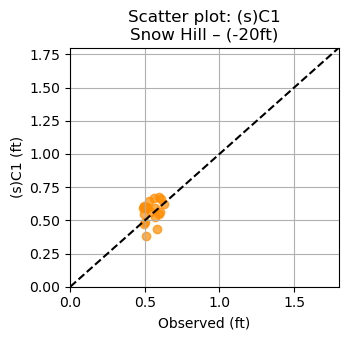

In [265]:
#C1
# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C1_peak1': sim_peaks[0], 'C1_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C1_peak1'], peaks_snow_filtered['C1_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1 (ft)')
plt.title('Scatter plot: (s)C1\nSnow Hill – (-20ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C1_peak1'], peaks_snow_filtered['C1_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

plt.xlabel('Observed WaterLevel_ft (ft)')
plt.ylabel('(s)C1 (ft)')
plt.title('Scatter plot: (s)C1\nSnow Hill – (-20ft)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Set axis limits manually
plt.xlim(0, 2)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 2)   # Change 0, 2 to your desired y-axis limits

plt.show()


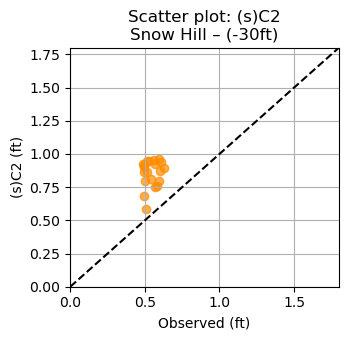

In [266]:
#C2
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C2']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C2_peak1': sim_peaks[0], 'C2_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C2', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C2_peak1'], peaks_snow_filtered['C2_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C2 (ft)')
plt.title('Scatter plot: (s)C2\nSnow Hill – (-30ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


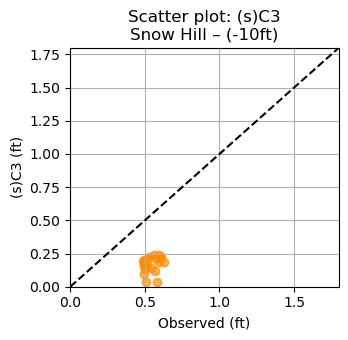

In [267]:
# C3
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C3']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C3_peak1': sim_peaks[0], 'C3_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C3', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C3_peak1'], peaks_snow_filtered['C3_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C3 (ft)')
plt.title('Scatter plot: (s)C3\nSnow Hill – (-10ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


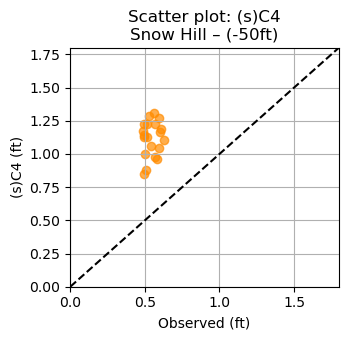

In [269]:
# C4
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C4']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C4_peak1': sim_peaks[0], 'C4_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C4', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C4_peak1'], peaks_snow_filtered['C4_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C4 (ft)')
plt.title('Scatter plot: (s)C4\nSnow Hill – (-50ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


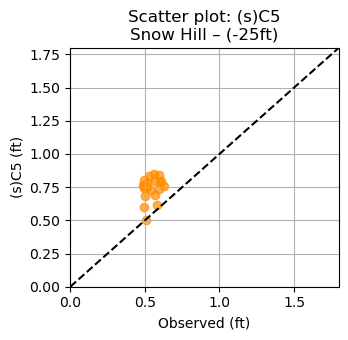

In [270]:
# C5
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C5']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C5_peak1': sim_peaks[0], 'C5_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C5', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C5_peak1'], peaks_snow_filtered['C5_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C5 (ft)')
plt.title('Scatter plot: (s)C5\nSnow Hill – (-25ft)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


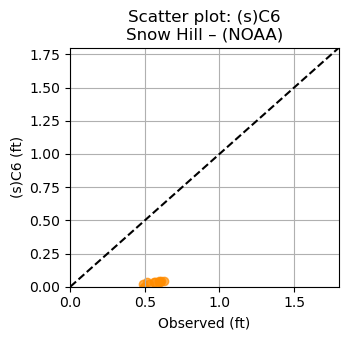

In [271]:
# C6
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C6']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C6_peak1': sim_peaks[0], 'C6_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C6', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-13").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C6_peak1'], peaks_snow_filtered['C6_peak2']])
plt.scatter(x, y, color='darkorange', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C6 (ft)')
plt.title('Scatter plot: (s)C6\nSnow Hill – (NOAA)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Manning 0.05
    - I am selecting the -20ft because I think it is the best one.

## Sheltown 

Plan	Terrain	LC	In		Geometry	Model 	EQ
C1' (ProjectA_.p16)	-20	original	original	using with channels pocomoke (4)	Coastalcopy	ProjectA	DF
C2' (ProjectA_.p17)	-30	original	original		Coastalcopy	ProjectA	DF
 'C3' (ProjectA_.p18)	-10	original	original		Coastalcopy	ProjectA	DF
 'C4' (ProjectA_.p19)	-50	original	original		Coastalcopy	ProjectA	DF
 'C5' (ProjectA_.p20)	-25	original	original		Coastalcopy	ProjectA	DF
 'C6' (ProjectA_.p21)	NOAA	original	original	NOAA NC	Coastalcopy	ProjectA	DF
C1.1  (ProjectA_.p22)	-20	0.05	original		Coastalcopy	ProjectA	DF
C1.2' (ProjectA_.p23)	-20	0.04	original		Coastalcopy	ProjectA	DF
C1.3' (ProjectA_.p24)	-20	0.04	original		Coastalcopy	ProjectA	SWE


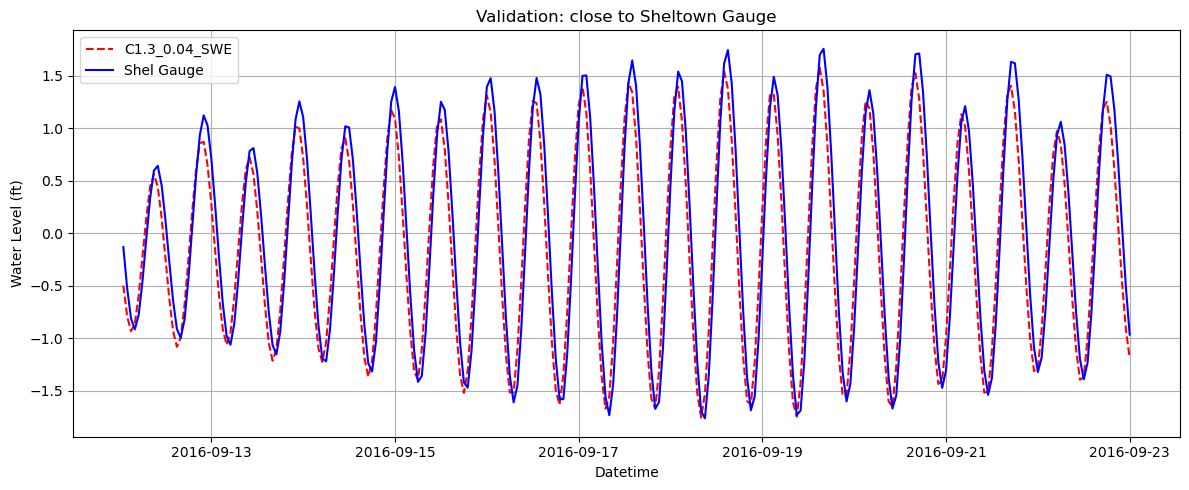

In [231]:
# Compare to Shelltown

# === Path to your Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx" #projectA_geometry Coastal copy

# === Load Data ===
df_cross1 = pd.read_excel(excel_path, sheet_name='Cross1')
df_shel = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean column names ===
df_cross1.columns = df_cross1.columns.str.strip()
df_shel.columns = df_shel.columns.str.strip()

# === Convert datetime ===
df_cross1['Datetime'] = pd.to_datetime(df_cross1['Datetime'])
df_shel['Datetime'] = pd.to_datetime(df_shel['Datetime'])

# === SELECT DATE RANGE ===
start_date = "2016-09-12"
end_date = "2016-09-23"

# === Filter both DataFrames to the same date range ===
df_cross1_filtered = df_cross1[(df_cross1['Datetime'] >= start_date) & (df_cross1['Datetime'] <= end_date)]
df_shel_filtered = df_shel[(df_shel['Datetime'] >= start_date) & (df_shel['Datetime'] <= end_date)]

# === Merge DataFrames on Datetime to keep only common timestamps ===
df_merged = pd.merge(
    df_cross1_filtered[['Datetime', 'C1', 'C1.1', 'C1.2', 'C1.3']],
    df_shel_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
#plt.plot(df_merged['Datetime'], df_merged['C1'], label='C1_0.035', linestyle='--', color='green')
#plt.plot(df_merged['Datetime'], df_merged['C1.1'], label='C1.1_0.05', linestyle='--', color='red')
#plt.plot(df_merged['Datetime'], df_merged['C1.2'], label='C1.2_0.04', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['C1.3'], label='C1.3_0.04_SWE', linestyle='--', color='red')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label='Shel Gauge', linestyle='-', color='blue')


plt.title("Validation: close to Sheltown Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### RMSE

In [201]:
#Step1 to run
# === Load Excel file ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim_snow = pd.read_excel(excel_path, sheet_name='Cross1')  # simulated
df_obs_snow = pd.read_excel(excel_path, sheet_name='Shel')      # observed

# === Clean and convert datetime ===
df_sim_snow.columns = df_sim_snow.columns.str.strip()
df_obs_snow.columns = df_obs_snow.columns.str.strip()
df_sim_snow['Datetime'] = pd.to_datetime(df_sim_snow['Datetime'])
df_obs_snow['Datetime'] = pd.to_datetime(df_obs_snow['Datetime'])

# === Filter by date range ===
start_date = "2016-09-12"
end_date = "2016-09-23"
df_sim_snow = df_sim_snow[(df_sim_snow['Datetime'] >= start_date) & (df_sim_snow['Datetime'] <= end_date)]
df_obs_snow = df_obs_snow[(df_obs_snow['Datetime'] >= start_date) & (df_obs_snow['Datetime'] <= end_date)]

# === Merge on datetime ===
df_snow_merged = pd.merge(df_sim_snow, df_obs_snow[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

In [202]:
# === Step-by-step RMSE for (s)C1.1 ===
sim = df_snow_merged['C1.1']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c11 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill C1.1:", round(rmse_c11, 3), "ft")

✅ Step 4: RMSE for Snow Hill C1.1: 0.348 ft


In [204]:
# === Step-by-step RMSE for (s)C1.2 ===
sim = df_snow_merged['C1.2']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c12 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill C1.2:", round(rmse_c12, 3), "ft")

✅ Step 4: RMSE for Snow Hill C1.2: 0.353 ft


In [205]:
# === Step-by-step RMSE for (s)C1.2 ===
sim = df_snow_merged['C1.3']
obs = df_snow_merged['WaterLevel_ft']

# 2. Calculate the difference
diff = sim - obs

# 3. Square the differences
squared_diff = diff ** 2

# 4. Compute the mean of the squared differences
mse = squared_diff.mean()

# 5. Take the square root to get RMSE
rmse_c13 = np.sqrt(mse)

print("✅ Step 4: RMSE for Snow Hill C1.3:", round(rmse_c13, 3), "ft")

✅ Step 4: RMSE for Snow Hill C1.3: 0.344 ft


In [ ]:
# Prepare RMSE values for C1.1, C1.2, C1.3
rmse_table_c1x = pd.DataFrame({
    'Column': ['C1.1', 'C1.2', 'C1.3'],
    'RMSE (ft)': [rmse_c11, rmse_c12, rmse_c13]
})

# Display the table
rmse_table_c1x.style.format({'RMSE (ft)': '{:.3f}'})

,Column,RMSE (ft)
0,C1.1,0.348
1,C1.2,0.353
2,C1.3,0.344


### Scatter plot for Shelltown peaks

In [316]:
#Step1
# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross1')  # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Shel')      # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

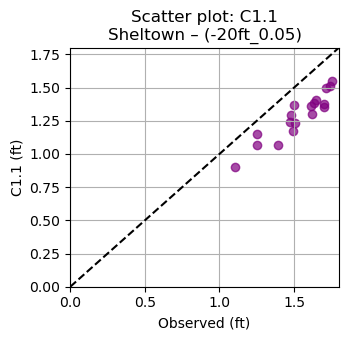

In [317]:
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', 'C1.1']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C11_peak1': sim_peaks[0], 'C11_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, 'C1.1', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C11_peak1'], peaks_snow_filtered['C11_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C1.1 (ft)')
plt.title('Scatter plot: C1.1\nSheltown – (-20ft_0.05)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

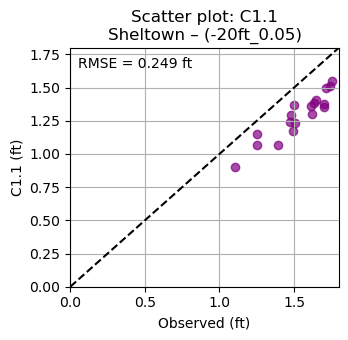

In [319]:
#Scatter plot for C1.1 + RMSE

# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross1')     # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Shel')       # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

# === Merge simulated and observed data ===
df_shel = pd.merge(df_sim[['Datetime', 'C1.1']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C11_peak1': sim_peaks[0], 'C11_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_shel = find_daily_peaks_simple(df_shel, 'C1.1', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_shel_filtered = peaks_shel[(peaks_shel['date'] >= start) & (peaks_shel['date'] <= end)]

# === Flatten for metrics ===
x = pd.concat([peaks_shel_filtered['obs_peak1'], peaks_shel_filtered['obs_peak2']])
y = pd.concat([peaks_shel_filtered['C11_peak1'], peaks_shel_filtered['C11_peak2']])

# === RMSE Calculation (step-by-step) ===
diff = y - x
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 reference line
plt.plot([0, 2], [0, 2], 'k--', label='1:1 line')

# Axis limits
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

# Labels and title
plt.xlabel('Observed (ft)')
plt.ylabel('C1.1 (ft)')
plt.title('Scatter plot: C1.1\nSheltown – (-20ft_0.05)')
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')
plt.grid(True)
plt.tight_layout()
plt.show()


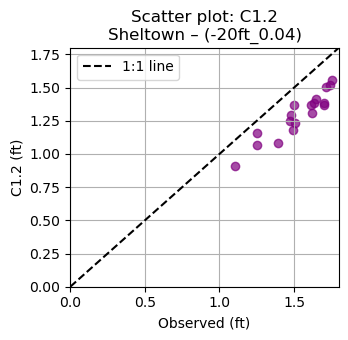

In [320]:
#C1.2
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', 'C1.2']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C12_peak1': sim_peaks[0], 'C12_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, 'C1.2', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C12_peak1'], peaks_snow_filtered['C12_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C1.2 (ft)')
plt.title('Scatter plot: C1.2\nSheltown – (-20ft_0.04)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

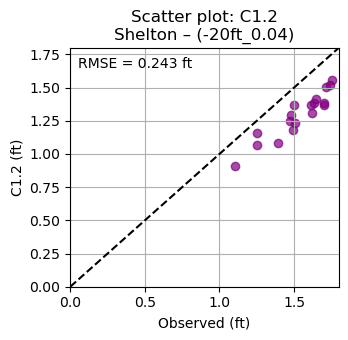

In [321]:
#C1.2 + RMSE

# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross1')     # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Shel')       # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

# === Merge simulated and observed data ===
df_shel = pd.merge(df_sim[['Datetime', 'C1.2']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C12_peak1': sim_peaks[0], 'C12_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_shel = find_daily_peaks_simple(df_shel, 'C1.2', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_shel_filtered = peaks_shel[(peaks_shel['date'] >= start) & (peaks_shel['date'] <= end)]

# === Flatten for metrics ===
x = pd.concat([peaks_shel_filtered['obs_peak1'], peaks_shel_filtered['obs_peak2']])
y = pd.concat([peaks_shel_filtered['C12_peak1'], peaks_shel_filtered['C12_peak2']])

# === RMSE Calculation (step-by-step) ===
diff = y - x
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 reference line
plt.plot([0, 2], [0, 2], 'k--', label='1:1 line')

# Axis limits
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

# Labels and title
plt.xlabel('Observed (ft)')
plt.ylabel('C1.2 (ft)')
plt.title('Scatter plot: C1.2\nShelton – (-20ft_0.04)')
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')
plt.grid(True)
plt.tight_layout()
plt.show()


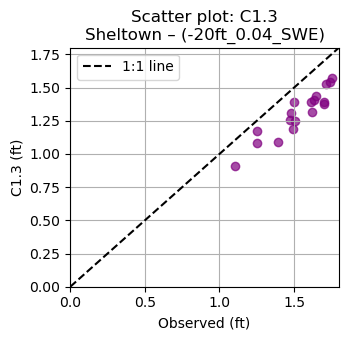

In [322]:
#C1.3
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', 'C1.3']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C13_peak1': sim_peaks[0], 'C13_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, 'C1.3', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C13_peak1'], peaks_snow_filtered['C13_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('C1.3 (ft)')
plt.title('Scatter plot: C1.3\nSheltown – (-20ft_0.04_SWE)')
plt.legend()
plt.grid(True)
plt.tight_layout()

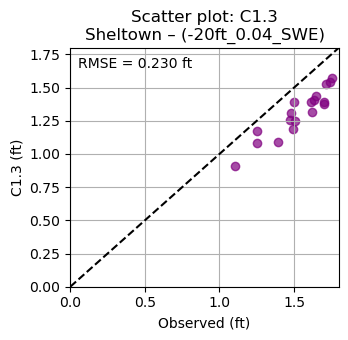

In [326]:
#C1.3 + RMSE

# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross1')     # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Shel')       # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

# === Merge simulated and observed data ===
df_shel = pd.merge(df_sim[['Datetime', 'C1.3']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C13_peak1': sim_peaks[0], 'C13_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_shel = find_daily_peaks_simple(df_shel, 'C1.3', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_shel_filtered = peaks_shel[(peaks_shel['date'] >= start) & (peaks_shel['date'] <= end)]

# === Flatten for metrics ===
x = pd.concat([peaks_shel_filtered['obs_peak1'], peaks_shel_filtered['obs_peak2']])
y = pd.concat([peaks_shel_filtered['C13_peak1'], peaks_shel_filtered['C13_peak2']])

# === RMSE Calculation (step-by-step) ===
diff = y - x
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 reference line
plt.plot([0, 2], [0, 2], 'k--', label='1:1 line')

# Axis limits
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

# Labels and title
plt.xlabel('Observed (ft)')
plt.ylabel('C1.3 (ft)')
plt.title('Scatter plot: C1.3\nSheltown – (-20ft_0.04_SWE)')
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')
plt.grid(True)
plt.tight_layout()
plt.show()


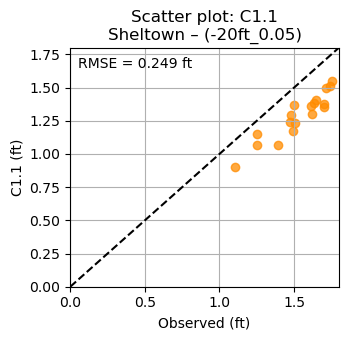

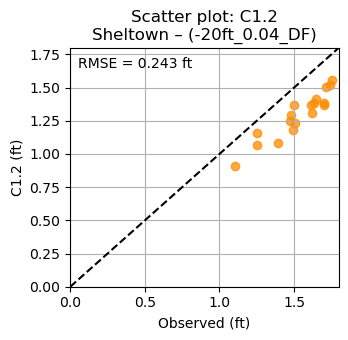

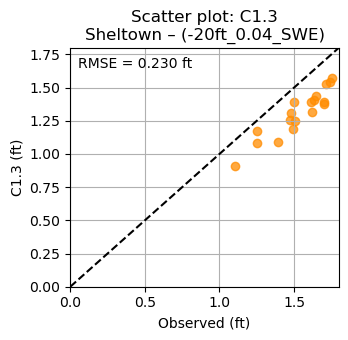

In [327]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load Excel Data ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross1')
df_obs = pd.read_excel(excel_path, sheet_name='Shel')

# === Clean & Convert ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

# === Peak Extraction Function ===
def extract_daily_peaks(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({
            'date': date,
            'sim_peak1': sim_peaks[0], 'sim_peak2': sim_peaks[1],
            'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]
        })
    return pd.DataFrame(peaks)

# === Compare Function ===
def plot_validation(sim_col_name, title_label):
    # Merge
    df_merge = pd.merge(df_sim[['Datetime', sim_col_name]],
                        df_obs[['Datetime', 'WaterLevel_ft']],
                        on='Datetime', how='inner')

    # Peaks
    peaks = extract_daily_peaks(df_merge, sim_col_name, 'WaterLevel_ft')

    # Filter date
    start = pd.to_datetime("2016-09-14").date()
    end = pd.to_datetime("2016-09-22").date()
    peaks_filtered = peaks[(peaks['date'] >= start) & (peaks['date'] <= end)]

    # Flatten
    x = pd.concat([peaks_filtered['obs_peak1'], peaks_filtered['obs_peak2']])
    y = pd.concat([peaks_filtered['sim_peak1'], peaks_filtered['sim_peak2']])

    # RMSE
    diff = y - x
    rmse = np.sqrt(np.nanmean(diff**2))

    # Plot
    plt.figure(figsize=(3.5, 3.5))
    plt.scatter(x, y, color='darkorange', alpha=0.75)
    plt.plot([0, 2], [0, 2], 'k--', label='1:1 Line')

    plt.xlim(0, 1.8)
    plt.ylim(0, 1.8)
    plt.xlabel('Observed (ft)')
    plt.ylabel(f'{sim_col_name} (ft)')
    plt.title(f'Scatter plot: {sim_col_name}\nSheltown – {title_label}')
    plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Call for each cross-section ===
plot_validation('C1.1', '(-20ft_0.05)')
plot_validation('C1.2', '(-20ft_0.04_DF)')
plot_validation('C1.3', '(-20ft_0.04_SWE)')


## Snow

Plan	          Terrain	LC	      In		    Geometry	Model 	   EQ
C1' (ProjectA_.p16)	-20	original	original	using with channels pocomoke (4)
C2' (ProjectA_.p17)	-30	original	original		Coastalcopy	ProjectA	DF
C3' (ProjectA_.p18)	-10	original	original		Coastalcopy	ProjectA	DF
C4' (ProjectA_.p19)	-50	original	original		Coastalcopy	ProjectA	DF
C5' (ProjectA_.p20)	-25	original	original		Coastalcopy	ProjectA	DF
C6' (ProjectA_.p21)	NOAA	original	original	NOAA NC	Coastalcopy	ProjectA	DF
C1.1  (ProjectA_.p22)	-20	0.05	original		Coastalcopy	ProjectA	DF
C1.2' (ProjectA_.p23)	-20	0.04	original		Coastalcopy	ProjectA	DF
C1.3' (ProjectA_.p24)	-20	0.04	original		Coastalcopy	ProjectA	SWE


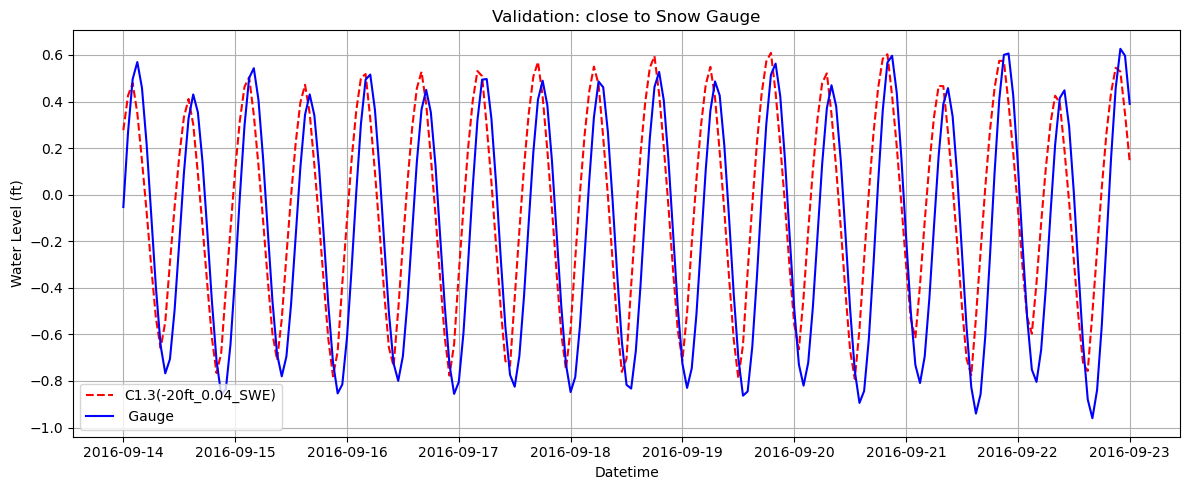

In [355]:
# Compare to Snow Gauge times series

# === Path to Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"

# === Load Data ===
df_cross31 = pd.read_excel(excel_path, sheet_name='Cross 31')
df_s = pd.read_excel(excel_path, sheet_name='Snow')

# === Clean column names ===
df_cross31.columns = df_cross31.columns.str.strip()
df_s.columns = df_s.columns.str.strip()

# === Convert datetime ===
df_cross31['Datetime'] = pd.to_datetime(df_cross31['Datetime'])
df_s['Datetime'] = pd.to_datetime(df_s['Datetime'])

# === Filter date range ===
start_date = "2016-09-14"
end_date = "2016-09-23"
df_cross31_filtered = df_cross31[(df_cross31['Datetime'] >= start_date) & (df_cross31['Datetime'] <= end_date)]
df_s_filtered = df_s[(df_s['Datetime'] >= start_date) & (df_s['Datetime'] <= end_date)]

# === Merge on common timestamps ===
df_merged = pd.merge(
    df_cross31_filtered[['Datetime', '(s)C1', '(s)C1.1', '(s)C1.2', '(s)C1.3']],
    df_s_filtered[['Datetime', 'WaterLevel_ft']],
    on='Datetime', how='inner'
)

# === Plot ===
plt.figure(figsize=(12, 5))
# plt.plot(df_merged['Datetime'], df_merged['(s)C1'], label='C1(-20ft_0.035)', linestyle='--', color='green')
# plt.plot(df_merged['Datetime'], df_merged['(s)C1.1'], label='C1.1(-20ft_0.05)', linestyle='--', color='red')
# plt.plot(df_merged['Datetime'], df_merged['(s)C1.2'], label='C1.2(-20ft_0.04)', linestyle='--', color='purple')
plt.plot(df_merged['Datetime'], df_merged['(s)C1.3'], label='C1.3(-20ft_0.04_SWE)', linestyle='--', color='red')
plt.plot(df_merged['Datetime'], df_merged['WaterLevel_ft'], label=' Gauge', linestyle='-', color='blue')

plt.title("Validation: close to Snow Gauge")
plt.xlabel("Datetime")
plt.ylabel("Water Level (ft)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Scatter plot and RMSE

In [305]:
# === Load Excel ===
excel_path = r"C:\Github\Lab_work\Pocomoke\validation_step3\COASTAL\Coastal_ele.xlsx"
df_sim = pd.read_excel(excel_path, sheet_name='Cross 31')  # simulated
df_obs = pd.read_excel(excel_path, sheet_name='Snow')      # observed

# === Clean column names and convert datetime ===
df_sim.columns = df_sim.columns.str.strip()
df_obs.columns = df_obs.columns.str.strip()
df_sim['Datetime'] = pd.to_datetime(df_sim['Datetime'])
df_obs['Datetime'] = pd.to_datetime(df_obs['Datetime'])

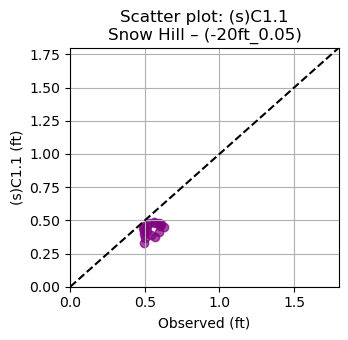

In [307]:
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1.1']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C11_peak1': sim_peaks[0], 'C11_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1.1', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C11_peak1'], peaks_snow_filtered['C11_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.1 (ft)')
plt.title('Scatter plot: (s)C1.1\nSnow Hill – (-20ft_0.05)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

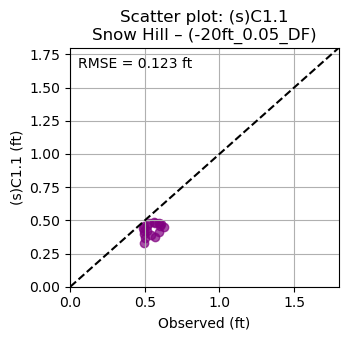

In [ ]:
# C1.1 + RMSE

# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1.1']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C11_peak1': sim_peaks[0], 'C11_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1.1', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Prepare flattened data for metrics ===
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C11_peak1'], peaks_snow_filtered['C11_peak2']])

# === RMSE calculation step-by-step ===
diff = y - x
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Scatter plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.1 (ft)')
plt.title('Scatter plot: (s)C1.1\nSnow Hill – (-20ft_0.05_DF)')
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


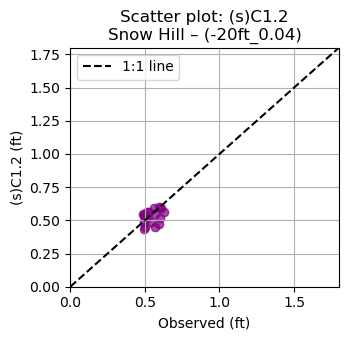

In [ ]:
#C1.2
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1.2']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C12_peak1': sim_peaks[0], 'C12_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1.2', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C12_peak1'], peaks_snow_filtered['C12_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.2 (ft)')
plt.title('Scatter plot: (s)C1.2\nSnow Hill – (-20ft_0.04)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

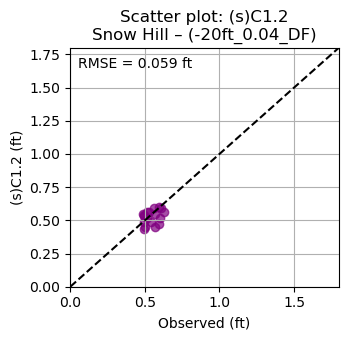

In [ ]:
#C1.2 + RMSE

# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1.2']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C12_peak1': sim_peaks[0], 'C12_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1.2', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Prepare flattened data for metrics ===
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C12_peak1'], peaks_snow_filtered['C12_peak2']])

# === RMSE calculation step-by-step ===
diff = y - x
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Scatter plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.2 (ft)')
plt.title('Scatter plot: (s)C1.2\nSnow Hill – (-20ft_0.04_DF)')
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


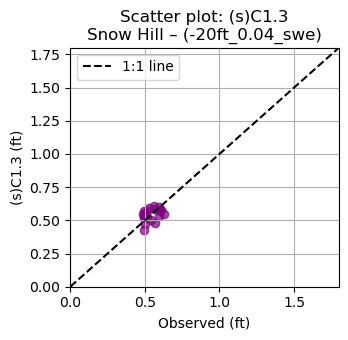

In [ ]:
#C3
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1.3']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C13_peak1': sim_peaks[0], 'C13_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1.3', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Flatten and plot ===
plt.figure(figsize=(3.5, 3.5))
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C13_peak1'], peaks_snow_filtered['C13_peak2']])
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)   # Change 0, 2 to your desired x-axis limits
plt.ylim(0, 1.8)   # Change 0, 2 to your desired y-axis limits

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.3 (ft)')
plt.title('Scatter plot: (s)C1.3\nSnow Hill – (-20ft_0.04_swe)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

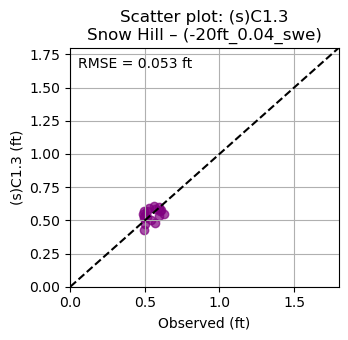

In [ ]:
#  C1.3 + RMSE
# === Merge simulated and observed data ===
df_snow = pd.merge(df_sim[['Datetime', '(s)C1.3']], df_obs[['Datetime', 'WaterLevel_ft']], on='Datetime', how='inner')

# === Define peak-finding function ===
def find_daily_peaks_simple(df, sim_col, obs_col):
    df = df.copy()
    df['date'] = df['Datetime'].dt.date
    peaks = []
    for date, group in df.groupby('date'):
        sim_peaks = group[sim_col].nlargest(2).values
        obs_peaks = group[obs_col].nlargest(2).values
        sim_peaks = np.pad(sim_peaks, (0, 2 - len(sim_peaks)), constant_values=np.nan)
        obs_peaks = np.pad(obs_peaks, (0, 2 - len(obs_peaks)), constant_values=np.nan)
        peaks.append({'date': date, 'C13_peak1': sim_peaks[0], 'C13_peak2': sim_peaks[1],
                      'obs_peak1': obs_peaks[0], 'obs_peak2': obs_peaks[1]})
    return pd.DataFrame(peaks)

# === Get daily peaks ===
peaks_snow = find_daily_peaks_simple(df_snow, '(s)C1.3', 'WaterLevel_ft')

# === Filter date range ===
start = pd.to_datetime("2016-09-14").date()
end = pd.to_datetime("2016-09-22").date()
peaks_snow_filtered = peaks_snow[(peaks_snow['date'] >= start) & (peaks_snow['date'] <= end)]

# === Prepare flattened data for metrics ===
x = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']])
y = pd.concat([peaks_snow_filtered['C13_peak1'], peaks_snow_filtered['C13_peak2']])

# === RMSE calculation step-by-step ===
diff = y - x
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Scatter plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(x, y, color='purple', alpha=0.7)

# 1:1 line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits manually
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.3 (ft)')
plt.title('Scatter plot: (s)C1.3\nSnow Hill – (-20ft_0.04_swe)')
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Number of valid peak pairs: 18
Step 6 - RMSE C1.3 (for peaks only): 0.05290262903754801


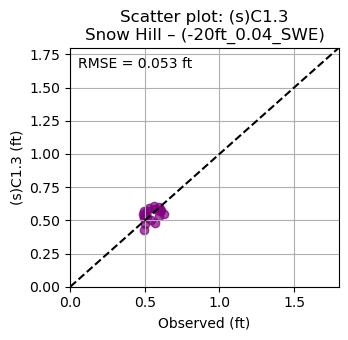

In [ ]:
#RMSE for peaks C1.3

# === Step 1: Flatten the filtered peak columns into one series ===
obs_all = pd.concat([peaks_snow_filtered['obs_peak1'], peaks_snow_filtered['obs_peak2']]).reset_index(drop=True)
sim_all = pd.concat([peaks_snow_filtered['C13_peak1'], peaks_snow_filtered['C13_peak2']]).reset_index(drop=True)

# === Step 2: Drop any rows where either value is NaN (some days may not have 2 peaks) ===
valid_mask = (~obs_all.isna()) & (~sim_all.isna())
obs_valid = obs_all[valid_mask]
sim_valid = sim_all[valid_mask]

# === Step 3: Compute RMSE ===
diff = sim_valid - obs_valid
squared_diff = diff ** 2
mse = squared_diff.mean()
rmse = np.sqrt(mse)

# === Step-by-step printout ===
print("Number of valid peak pairs:", len(obs_valid))
# print("Step 1 - Observed peaks:\n", obs_valid.head())
# print("Step 2 - Simulated peaks:\n", sim_valid.head())
# print("Step 3 - Difference:\n", diff.head())
# print("Step 4 - Squared Difference:\n", squared_diff.head())
# print("Step 5 - MSE:", mse)
print("Step 6 - RMSE C1.3 (for peaks only):", rmse)

# === Plot ===
plt.figure(figsize=(3.5, 3.5))
plt.scatter(obs_valid, sim_valid, color='purple', alpha=0.7)

# 1:1 reference line
min_val = 0
max_val = 2
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='1:1 line')

# Set axis limits
plt.xlim(0, 1.8)
plt.ylim(0, 1.8)

# === Annotate RMSE ===
plt.text(0.05, 1.65, f'RMSE = {rmse:.3f} ft', fontsize=10, color='black')

# Labels and title
plt.xlabel('Observed (ft)')
plt.ylabel('(s)C1.3 (ft)')
plt.title('Scatter plot: (s)C1.3\nSnow Hill – (-20ft_0.04_SWE)')
#plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### 1month

### 